# Objective:

Develop and optimize 3 machine learning models (logistic regression, decision tree and random forest) 
to predict those who have diabetes (gh >= 6.5%) using Python in a Jupyter notebook. 
Tereafter, interpret and compare the fine-tuned models

1 Data ingestion will be uploaded from python to DBMS
2 Metadata will be exported from DBMS into a CSV file.  
3 Generate descriptive statistics, and Perform data transformation that will be cleaned or normalized in SQL
4 Store transformed data into a new temp table
5 Export new transfored data into CSV file from DBMS

6 Data Preparation
- Check missing values
- Generate descriptive statistics and visualiation


In [ ]:
pip install openpyxl

Dimensions of the dataset: (6795, 21)


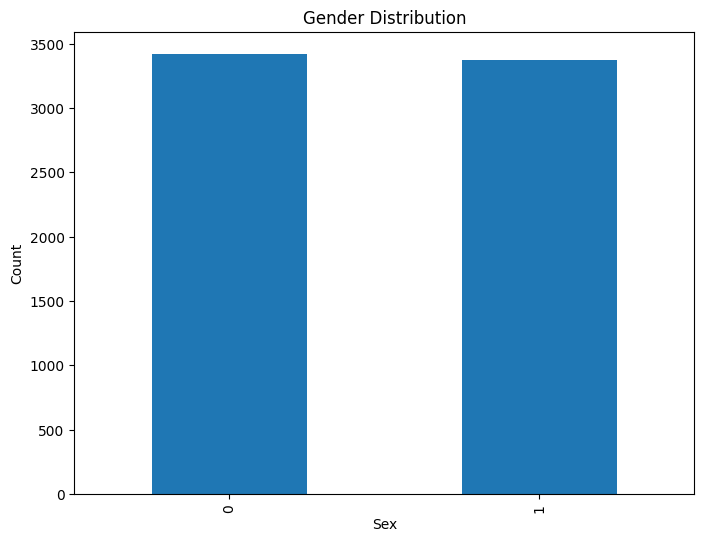

Dimensions of the dataset: (4322, 21)


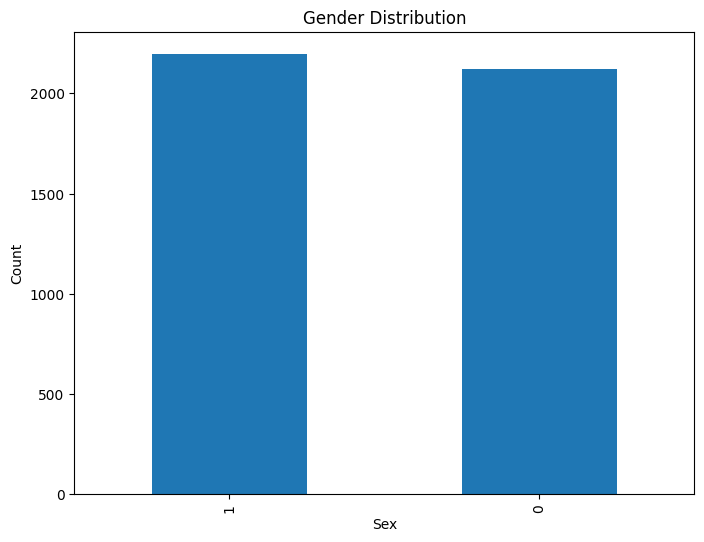

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
#url = 'https://hbiostat.org/data/repo/nhgh/nhgh.tsv'
#data = pd.read_csv(url, sep='\t')

data = pd.read_excel('Glycohemoglobin_t2.xlsx')
data.head(1)

print("Dimensions of the dataset: {}".format(data.shape))

plt.figure(figsize=(8, 6))
data['Sex'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Step 1: Data Tidying
# Handle missing values
data = data.dropna()

# Convert categorical variables
data = pd.get_dummies(data, drop_first=True)
data.head(10)

print("Dimensions of the dataset: {}".format(data.shape))
#print(data.dtypes)
plt.figure(figsize=(8, 6))
data['Sex'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Define the target variable (gh >= 6.5%)
data['diabetes'] = np.where(data['Glycohemoglobin_%'] >= 6.5, 1, 0)

# Step 2: Split the data
X = data.drop(['Glycohemoglobin_%', 'diabetes'], axis=1)
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
# Model Development and Optimization

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
logreg_auc = roc_auc_score(y_test, y_pred_logreg)
print('Logistic Regression AUC: ', logreg_auc)

# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
dtree_auc = roc_auc_score(y_test, y_pred_dtree)
print('Decision Tree AUC: ', dtree_auc)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_auc = roc_auc_score(y_test, y_pred_rf)
print('Random Forest AUC: ', rf_auc)

# Hyperparameter Tuning (example for Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
best_rf_auc = roc_auc_score(y_test, y_pred_best_rf)
print('Tuned Random Forest AUC: ', best_rf_auc)

Logistic Regression AUC:  0.8247015449438202
Decision Tree AUC:  0.7503413701622972
Random Forest AUC:  0.8397023252184769
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Tuned Random Forest AUC:  0.8481390449438202


# Diabetes Prediction Models

This repository contains a Jupyter notebook for predicting diabetes using Logistic Regression, Decision Tree, and Random Forest models.

In [26]:
# Model Comparison
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dtree))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Best Tuned Random Forest Report:\n", classification_report(y_test, y_pred_best_rf))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       801
           1       0.70      0.67      0.69        64

    accuracy                           0.95       865
   macro avg       0.84      0.82      0.83       865
weighted avg       0.95      0.95      0.95       865

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       801
           1       0.49      0.55      0.51        64

    accuracy                           0.92       865
   macro avg       0.72      0.75      0.74       865
weighted avg       0.93      0.92      0.93       865

Random Forest Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       801
           1       0.70      0.70      0.70        64

    accuracy                           0.96       865
   macro avg       0.84      0.84      0.84       865